In [1]:
import sys
import sklearn
import numpy as np
import os
import pandas as pd

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing training data
x_train = pd.read_csv("subset_2.csv") # Subset of best features
y_train = pd.read_csv("y_train_all.csv")

# Converting data to matrix
X = x_train.to_numpy()
y = y_train.to_numpy()

In [3]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Split the data into train and test via 10-fold cross validation
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
print("Training data shape: " + str(len(X_train)))
print("Test data shape: " + str(len(X_test)))

Training data shape: 8721
Test data shape: 969


In [4]:
from sklearn.linear_model import LogisticRegression

y_train = y_train.flatten()
y_train = (y_train == 7).astype(np.int64)

log_reg = LogisticRegression(solver="lbfgs", max_iter=400, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=400, random_state=42)

In [5]:
y_pred = log_reg.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.0


In [6]:
x_train = pd.read_csv("subset_2.csv")
y_train = pd.read_csv("y_train_all.csv")

X = x_train.to_numpy()
y = y_train.to_numpy()

x_test = pd.read_csv("test_subset_2.csv") 
y_test = pd.read_csv("y_test_all.csv")

X_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [7]:
y = y.flatten()
y = (y == 7).astype(np.int64)

log_reg = LogisticRegression(solver="lbfgs", max_iter=400, random_state=42)
log_reg.fit(X, y)

LogisticRegression(max_iter=400, random_state=42)

In [8]:
y_pred = log_reg.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.019417475728155338


# ANN

In [9]:
import cv2

In [10]:
# Read the training data CSV file
data_x_train = pd.read_csv("x_train_all.csv")
data_y_train = pd.read_csv("y_train_all.csv")
data_x_test = pd.read_csv("x_test_all.csv")
data_y_test = pd.read_csv("y_test_all.csv")

In [11]:
data_x_train = data_x_train.to_numpy()
data_x_test = data_x_test.to_numpy()

X_train = data_x_train.astype('float') / 255
X_test = data_x_test.astype('float') / 255

In [12]:
data_sm_x_train = np.apply_along_axis(
    func1d=lambda item: cv2.resize(item.reshape(48, 48), dsize=(30, 30)),
    axis=1, arr=X_train).reshape(-1, 30*30)

data_sm_x_test = np.apply_along_axis(
    func1d=lambda item: cv2.resize(item.reshape(48, 48), dsize=(30, 30)),
    axis=1, arr=X_test).reshape(-1, 30*30)

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

model = Sequential()
model.add(Flatten(input_shape=(900,)))
model.add(Dense(900,activation='relu'))
model.add(Dense(600,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 900)               0         
                                                                 
 dense (Dense)               (None, 900)               810900    
                                                                 
 dense_1 (Dense)             (None, 600)               540600    
                                                                 
 dense_2 (Dense)             (None, 300)               180300    
                                                                 
 dense_3 (Dense)             (None, 10)                3010      
                                                                 
Total params: 1534810 (5.85 MB)
Trainable params: 1534810 (5.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [16]:
history = model.fit(data_sm_x_train,data_y_train,epochs=50,validation_split=0.2)

Epoch 1/50


243/243 [==============================] - 4s 14ms/step - loss: 1.2352 - accuracy: 0.4884 - val_loss: 10.4061 - val_accuracy: 0.1342
Epoch 2/50
243/243 [==============================] - 3s 14ms/step - loss: 0.6967 - accuracy: 0.7501 - val_loss: 14.0521 - val_accuracy: 0.1538
Epoch 3/50
243/243 [==============================] - 3s 14ms/step - loss: 0.4887 - accuracy: 0.8287 - val_loss: 16.9241 - val_accuracy: 0.1336
Epoch 4/50
243/243 [==============================] - 4s 15ms/step - loss: 0.4353 - accuracy: 0.8431 - val_loss: 18.0557 - val_accuracy: 0.1491
Epoch 5/50
243/243 [==============================] - 4s 15ms/step - loss: 0.3940 - accuracy: 0.8553 - val_loss: 14.2833 - val_accuracy: 0.1512
Epoch 6/50
243/243 [==============================] - 4s 17ms/step - loss: 0.2960 - accuracy: 0.8956 - val_loss: 15.3400 - val_accuracy: 0.1533
Epoch 7/50
243/243 [==============================] - 4s 15ms/step - loss: 0.2590 - accuracy: 0.9060 - val_loss: 17.9575 - val_accurac

In [17]:
y_prob = model.predict(data_sm_x_test)

97/97 [==============================] - 0s 2ms/step


In [18]:
y_pred = y_prob.argmax(axis=1)

In [19]:
y_pred

array([1, 4, 3, ..., 3, 1, 1], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(data_y_test,y_pred)

0.7381877022653721

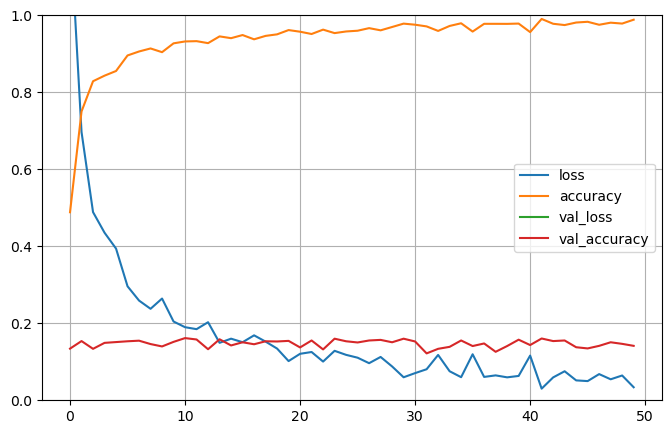

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [22]:
# Assuming data_sm_x_test[10] is a single sample
sample = data_sm_x_test[100]

# Add an extra dimension to make it a batch of one sample
# This can be done using np.expand_dims or reshaping
sample = np.expand_dims(sample, axis=0)

# Now use model.predict
prediction = model.predict(sample)

# Get the class with the highest probability
predicted_class = prediction.argmax(axis=1)

1/1 [==============================] - 0s 23ms/step


In [23]:
y_pred

array([1, 4, 3, ..., 3, 1, 1], dtype=int64)

In [24]:
predicted_class

array([1], dtype=int64)

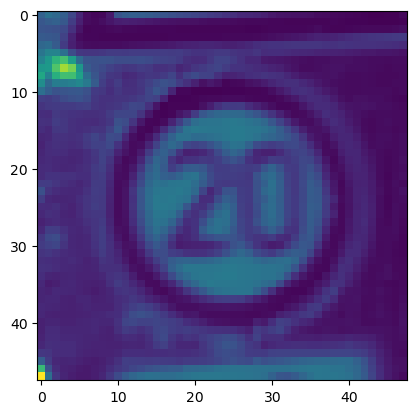

In [25]:
# Extract the eleventh row as an array
instance_to_plot = data_x_test[100]

# Reshape the array as 48x48 array
image_data = instance_to_plot.reshape(48, 48)

# Plot the image
plt.imshow(image_data)
plt.show()

In [26]:
# Q. What techniques can be used for performing hyperparameter tuning in a systematic way? 

'''
A. The techniques used for performing hyperparameter tuning in a systematic way are :

1) Random Search:
        
Random search randomly selects combinations of hyperparameter values.
This method is less exhaustive than grid search and can be more efficient,
especially when some hyperparameters are much more important than others.

2) Bayesian Optimization:
        
Bayesian optimization builds a probabilistic model of the function mapping from hyperparameter values 
to the objective evaluated on a validation set.
It uses the model to select the most promising hyperparameters to evaluate in the true objective function.
This approach is more sophisticated and can be more effective than grid or random search, especially in high-dimensional spaces.


''' 

'\nA. The techniques used for performing hyperparameter tuning in a systematic way are :\n\n1) Random Search:\n        \nRandom search randomly selects combinations of hyperparameter values.\nThis method is less exhaustive than grid search and can be more efficient,\nespecially when some hyperparameters are much more important than others.\n\n2) Bayesian Optimization:\n        \nBayesian optimization builds a probabilistic model of the function mapping from hyperparameter values \nto the objective evaluated on a validation set.\nIt uses the model to select the most promising hyperparameters to evaluate in the true objective function.\nThis approach is more sophisticated and can be more effective than grid or random search, especially in high-dimensional spaces.\n\n\n'

# CNN

In [27]:
# Read the training data CSV file
data_x_train = pd.read_csv("x_train_all.csv")
data_y_train = pd.read_csv("y_train_all.csv")
data_x_test = pd.read_csv("x_test_all.csv")
data_y_test = pd.read_csv("y_test_all.csv")

In [28]:
data_x_train = data_x_train.to_numpy()
data_x_test = data_x_test.to_numpy()

X_train = data_x_train.astype('float') / 255
X_test = data_x_test.astype('float') / 255

In [29]:
X_train_reshaped = data_x_train.reshape(-1, 48, 48, 1)
X_test_reshaped = data_x_test.reshape(-1, 48, 48, 1)

In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
# First Convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))

# Second Convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((3, 3)))

# Flattening followed by Dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax')) # Assuming 10 classes for classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_4 (Dense)             (None, 64)              

In [31]:
history = model.fit(X_train_reshaped,data_y_train,epochs=20,validation_split=0.2)

Epoch 1/20
243/243 [==============================] - 7s 24ms/step - loss: 1.3557 - accuracy: 0.5573 - val_loss: 21.2927 - val_accuracy: 0.1347
Epoch 2/20
243/243 [==============================] - 5s 22ms/step - loss: 0.3341 - accuracy: 0.9045 - val_loss: 30.8735 - val_accuracy: 0.1600
Epoch 3/20
243/243 [==============================] - 6s 23ms/step - loss: 0.1866 - accuracy: 0.9496 - val_loss: 39.1979 - val_accuracy: 0.1610
Epoch 4/20
243/243 [==============================] - 6s 23ms/step - loss: 0.1104 - accuracy: 0.9696 - val_loss: 41.1677 - val_accuracy: 0.1543
Epoch 5/20
243/243 [==============================] - 5s 22ms/step - loss: 0.0838 - accuracy: 0.9769 - val_loss: 34.0218 - val_accuracy: 0.1569
Epoch 6/20
243/243 [==============================] - 5s 22ms/step - loss: 0.0730 - accuracy: 0.9807 - val_loss: 52.4225 - val_accuracy: 0.1605
Epoch 7/20
243/243 [==============================] - 6s 23ms/step - loss: 0.0701 - accuracy: 0.9781 - val_loss: 37.2526 - val_accuracy:

In [32]:
y_prob = model.predict(X_test_reshaped)

97/97 [==============================] - 1s 7ms/step


In [33]:
y_pred = y_prob.argmax(axis=1)

In [34]:
y_pred

array([1, 4, 3, ..., 3, 1, 0], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(data_y_test,y_pred)

0.8161812297734627

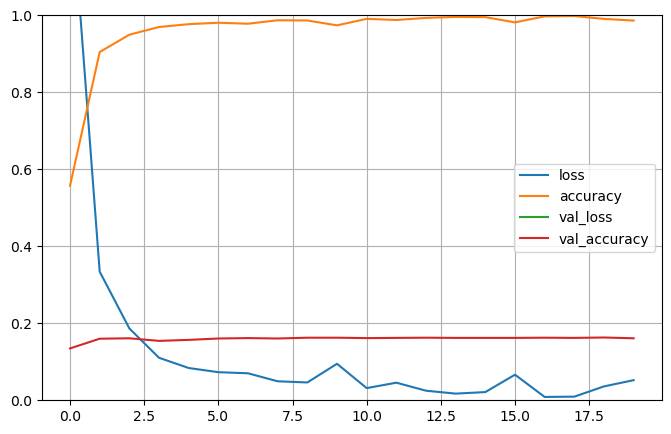

In [36]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [37]:
# Assuming data_sm_x_test[10] is a single sample
sample = X_test_reshaped[780]

# Add an extra dimension to make it a batch of one sample
# This can be done using np.expand_dims
sample = np.expand_dims(sample, axis=0)

# Now use model.predict
prediction = model.predict(sample)

# Get the class with the highest probability
predicted_class = prediction.argmax(axis=1)


1/1 [==============================] - 0s 21ms/step


In [38]:
predicted_class

array([4], dtype=int64)

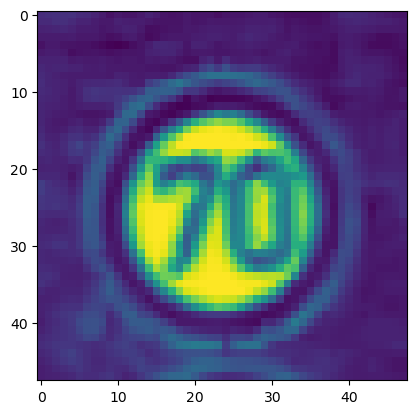

In [39]:
# Extract the eleventh row as an array
instance_to_plot = data_x_test[780]

# Reshape the array as 48x48 array
image_data = instance_to_plot.reshape(48, 48)

# Plot the image
plt.imshow(image_data)
plt.show()